<a href="https://colab.research.google.com/github/monttj/computational-physics/blob/2021/ComPhy-7-ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Artificial Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/computational-physics

/content/drive/My Drive/computational-physics


In [3]:
ls

common/                                 files/
ComPhy-10-Overtraining.ipynb            fourier.png
ComPhy-11-ConvNet.ipynb                 functions.png
ComPhy-1-Python.ipynb                   Gogh.png
ComPhy-2-ROOTandPyROOT.ipynb            hello_python.py
ComPhy-3-ROOTTree.ipynb                 HiggsChallenge1.csv
ComPhy-4-Fitting.ipynb                  HiggsChallenge2.csv
ComPhy-5-LikelihoodFitting.ipynb        input_expected.txt
ComPhy-6-MonteCarlo.ipynb               jupyter.sh
ComPhy-7-ArtificialNeuralNetwork.ipynb  Miniconda2-latest-Linux-x86_64.sh
ComPhy-8-Training.ipynb                 muonmass.png
ComPhy-9-Optimization.ipynb             README.md
ComPhy-Suppl1-Pandas.ipynb              score.txt
c.png                                   setup.sh
dataset/                                simpleTwoLayer.pkl
dimuonmass.png                          two_layer_net.py


we will use python to implement the artificial neural network algorithm. We need to learn additional features of python for this. 

### Show image

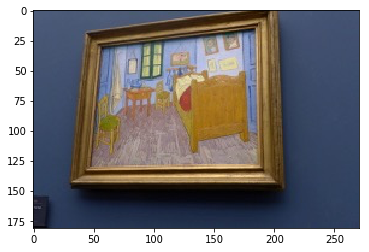

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('./Gogh.png') # read an image
plt.imshow(img)

plt.show()

### Numpy

##### import numpy package

In [ ]:
import numpy as np

In [ ]:
x = np.array([1, 2, 3])
print (x)

In [ ]:
type(x)

##### arithmetic operation

In [ ]:
x = np.array([1.0,2.0,3.0])
y = np.array([2.0,4.0,6.0])
x + y

In [ ]:
x - y

In [ ]:
x*y

In [ ]:
x/y

##### 2D array
  
$ 
A = \begin{pmatrix} 
1 & 2 & 3  \\
3 & 4 & 5
\end{pmatrix}
$
can be expressed as 2D array. 



In [ ]:
A = np.array([[1,2,3],[3,4,5]])
print (A)

A is $2 \times 3$ matrix. We can check. 

In [ ]:
A.shape

In [ ]:
A.dtype

##### Broadcasting

In [ ]:
B = np.array([[2,4,6],[0,1,2]])
A+B

In [ ]:
A*B

In [ ]:
A*10

In [ ]:
A = np.array([[1,2,3],[3,4,5]])
B = np.array([10,20,30])
A*B

In [ ]:
A[0] #row

In [ ]:
A[0,1] # location of (0,1)

In [ ]:
X = A.flatten()
print (X)

In [ ]:
X[np.array([0,2,4])] # location of index 0,2,4

In [ ]:
X > 2

In [ ]:
X[X>2]

##### matrix product

In [ ]:
A = np.array([[1,2,3],[3,4,5]])
np.ndim(A)

In [ ]:
B = np.array([[1,2],[2,3],[3,4]])
B

We have two matrices A and B:
$
A = \begin{pmatrix} 
1 & 2 & 3  \\
3 & 4 & 5
\end{pmatrix}
$
$
B = \begin{pmatrix} 
1 & 2   \\
2 & 3   \\
3 & 4   \\ 
\end{pmatrix}
$
We will multply matrix A and B 


In [ ]:
np.dot(A,B)

##### Question :

Can you multiply 

$
B = \begin{pmatrix} 
1 & 2   \\
2 & 3   \\
3 & 4   \\ 
\end{pmatrix}
$

by 

$
C = \begin{pmatrix} 
7   \\
8  \\
\end{pmatrix}
$ ?

In [ ]:
## need at least two lines. Use B above.
#C = ?
#B x C = ?

##### answer:

```
array([23, 38, 53])
```

##### draw a function

Now we will use ```matplotlib``` to draw plots. 
This is an alternative method. You can still use the ROOT library for the visualization. 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# input data
x = np.arange(0, 6, 0.1) # from 0 to 6 in steps of 0.1 
y = np.sin(x)

# draw graph
plt.plot(x, y)
plt.show()

In [ ]:
# input data
x = np.arange(0, 6, 0.1) # from 0 to 6 in steps of 0.1 
y1 = np.sin(x)
y2 = np.cos(x)

# draw graph
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle = "--", label="cos") # dashed line for cos function
plt.xlabel("x") # x-axis title
plt.ylabel("y") # y-axis title
plt.title('sin & cos')
plt.legend()
plt.show()

Following example is for exponential function. 

In [ ]:
import matplotlib.pyplot as plt
# input data
x = np.arange(0, 6, 0.1) # from 0 to 6 in steps of 0.1 
y = np.exp(x)
# draw graph
plt.plot(x, y, label="exp")
plt.xlabel("x") # x-axis title
plt.ylabel("y") # y-axis title
plt.title('exp')
plt.legend()
plt.show()

##### Question:
When the function is given as follows:
$$f(x) =
    \begin{cases}
      0, & -\pi < x < 0 \\
      1, & 0 < x < \pi 
    \end{cases}$$
    
Expand the periodic function in a sine-cosine Fourer series. 

In [ ]:
#in following code, you need to change only one number
x = np.arange(-10, 10, 0.1) 
y = 0
for k in range(0,10):
    if k % 2 == 1:
        y = y - 2/np.pi*np.sin(k*x)/k
y = y + 0.5
# draw graph
plt.plot(x, y, label="Fourier series")
plt.xlabel("x") # x-axis title
plt.ylabel("y") # y-axis title
plt.title('Fourier series')
plt.legend()
plt.show()

##### answer:

check the answer by running next cell


In [ ]:
img = imread('./fourier.png') # read an image
plt.imshow(img)
plt.show()


### Class reminder

In [ ]:
class Man:
    """sample class"""

    def __init__(self, name):
        self.name = name
        print("Initilized!")

    def hello(self):
        print("Hello " + self.name + "!")

    def goodbye(self):
        print("Good-bye " + self.name + "!")

m = Man("Gil-Dong")
m.hello()
m.goodbye()

### Perceptron

In [ ]:
import numpy as np

Now we will build ***AND*** gate.

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

Now we will build ***NAND*** gate.

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

Now we will build ***OR*** gate.

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

##### Question:

Can you implement ***XOR*** gate?

In [ ]:
# you need one more layer to implement XOR gate
def XOR(x1, x2):
    #s1 = 
    #s2 = 
    #y = 
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

##### answer:

```
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0
```

### Artificial Neural Network

Activation function becomes important in artificial neural network. 

In [ ]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # set y-axis range
plt.show()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # set y-axis range
plt.show()

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### Test with MNIST 

We will read data from MNIST. Following code shows how to show the image from this data set. 

Following code is to read the dataset. And check one of the sample and draw. 

In [ ]:
import sys, os
from dataset.mnist import load_mnist
import matplotlib.pylab as plt
import numpy as np

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print "Label = ", label  # 5

print "input shape size = ", img.shape # (784,)
img = img.reshape(28, 28)  # reshape the image to original shape 

plt.imshow(img, cmap='gray')
plt.show()
print "shape = ", img.shape 

For now, we will use the model which was already trained. 
So the parameters are already determied. 

The name of the model is ```simpleTwoLayer.pkl```.
This should be already in your current directory.

In [ ]:
ls simpleTwoLayer.pkl

In [ ]:
import sys, os
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("simpleTwoLayer.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # get the index which gives the highest probability
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Now use batch to calculate the accuracy

In [ ]:
import sys, os
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("simpleTwoLayer.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y


x, t = get_data()
network = init_network()

batch_size = 1000 # batch size
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Do you think accuracy calculation with batch is faster?